# Simulation workflow

In [1]:
import numpy as np
import healpy as hp
from astropy.time import Time, TimeDelta
from astropy.coordinates import EarthLocation
import numpy as np
import astropy.units as u

### An example of asymmetric beam

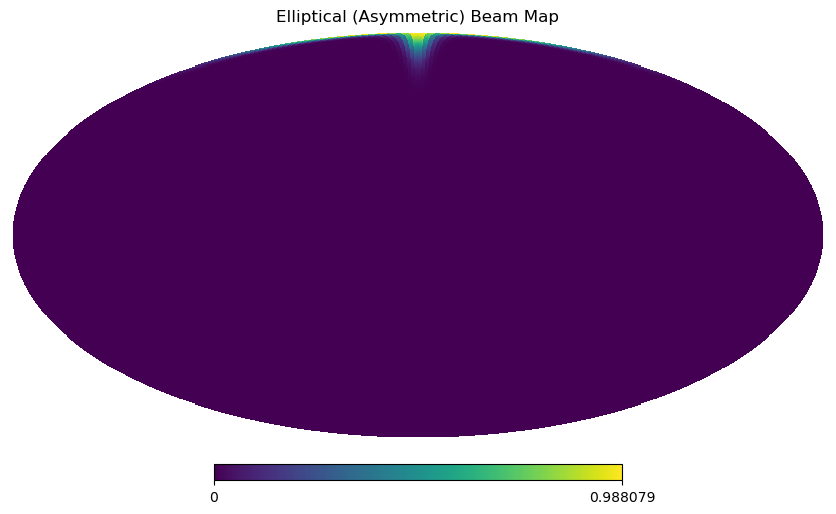

In [20]:

def elliptical_beam_map(theta_c=0, phi_c=0, FWHM_major=10, FWHM_minor=1, angle_deg=0, NSIDE=64):
    """
    Generate an asymmetric (elliptical) Gaussian beam map.
    FWHM_major: major axis FWHM in degrees
    FWHM_minor: minor axis FWHM in degrees
    angle_deg: orientation angle of major axis (degrees, from North)
    """
    NPIX = hp.nside2npix(NSIDE)
    theta, phi = hp.pix2ang(NSIDE, np.arange(NPIX))
    # Convert FWHM to sigma (radians)
    sigma_major = np.radians(FWHM_major / (2 * np.sqrt(2 * np.log(2))))
    sigma_minor = np.radians(FWHM_minor / (2 * np.sqrt(2 * np.log(2))))
    angle_rad = np.radians(angle_deg)
    # Compute offsets from beam center
    dtheta = theta - theta_c
    dphi = phi - phi_c
    # Convert to Cartesian offsets
    x = dtheta * np.cos(phi)
    y = dtheta * np.sin(phi)
    # Rotate by angle
    x_rot = x * np.cos(angle_rad) + y * np.sin(angle_rad)
    y_rot = -x * np.sin(angle_rad) + y * np.cos(angle_rad)
    # Elliptical Gaussian
    beam_map = np.exp(-0.5 * ((x_rot / sigma_major) ** 2 + (y_rot / sigma_minor) ** 2))
    # Normalize
    beam_map /= np.max(beam_map)
    hp.mollview(beam_map, title="Elliptical (Asymmetric) Beam Map")
    return beam_map

# Example asymmetric beam:
asym_beam = elliptical_beam_map(FWHM_major=25, FWHM_minor=5, angle_deg=0, NSIDE=64)

### Pointing the beam 

In [ ]:
TOD_sim_test = meerTODsim()
t_list, azimuths = example_scan()

test_result = TOD_sim_test.generate_TOD(
    freq_list=[950, 1050], 
    time_list=t_list, 
    azimuth_deg_list=azimuths,
) 


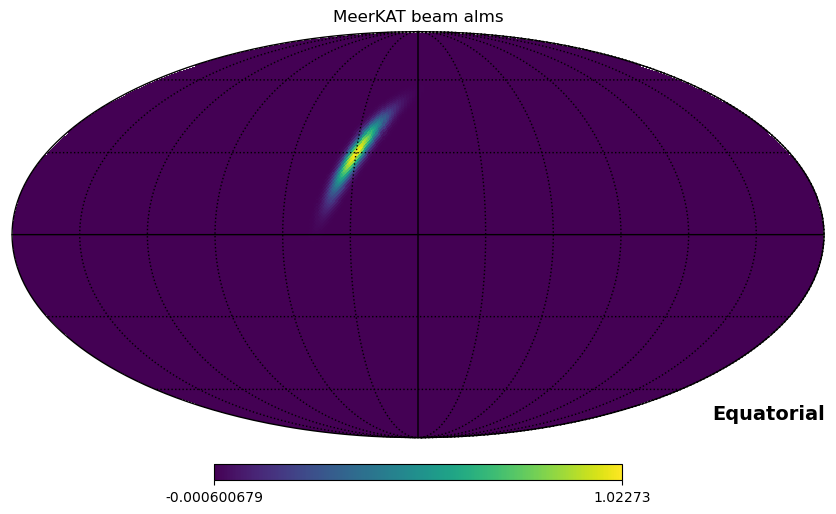

In [66]:
beam_hp_alm = hp.map2alm(asym_beam, lmax=191)
LST = 60  # degrees
lat = 30  # degrees
azimuth = 30  # degrees

# z
hp.rotate_alm(beam_hp_alm, np.radians(azimuth), np.radians(90-lat), np.radians(LST))
hp.mollview(hp.alm2map(beam_hp_alm, nside=64), title="MeerKAT beam alms", coord="C")

hp.graticule()
